# 📊 Notebook 1 : Exploration des Données

## Objectif : Comprendre la structure et la qualité des données

Ce notebook explore les données économiques du Mali (2014-2023) incluant :
- **Production** : Production totale en FCFA et en Tonnes
- **Consommation** : Consommation totale en FCFA et en Tonnes  
- **Commerce** : Import/Export en FCFA et en Tonnes

### Structure du notebook :
1. Chargement des données
2. Exploration de la structure
3. Analyse de la qualité des données
4. Statistiques descriptives
5. Visualisations exploratoires
6. Analyse des corrélations
7. Conclusions et insights

## 1. 📦 Import des bibliothèques

In [1]:
# Bibliothèques de base
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
import warnings
warnings.filterwarnings('ignore')

# Style des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Configuration pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ Bibliothèques importées avec succès!")

✅ Bibliothèques importées avec succès!


## 2. 📂 Chargement des données

Nous avons 6 fichiers CSV organisés en 3 catégories :
- **Production** : Production totale (FCFA & Tonnes)
- **Consommation** : Consommation totale (FCFA & Tonnes)
- **Commerce** : Import/Export (FCFA & Tonnes)

In [2]:
# Définition des chemins
BASE_PATH = Path("../data/raw")

# Chemins des fichiers
DATA_FILES = {
    'production_fcfa': BASE_PATH / 'production' / 'Production_Totale_FCFA_2014-2023.csv',
    'production_tonnes': BASE_PATH / 'production' / 'Production_Totale_Tonnes_2014-2023.csv',
    'consommation_fcfa': BASE_PATH / 'consommation' / 'Consommation_Totale_FCFA_2014-2023.csv',
    'consommation_tonnes': BASE_PATH / 'consommation' / 'Consommation_Totale_Tonnes_2014-2023.csv',
    'commerce_fcfa': BASE_PATH / 'import_export' / 'Commerce_FCFA_2014-2023.csv',
    'commerce_tonnes': BASE_PATH / 'import_export' / 'Commerce_Tonnes_2014-2023.csv'
}

# Vérification de l'existence des fichiers
print("📁 Vérification des fichiers de données:\n")
for name, path in DATA_FILES.items():
    exists = "✅" if path.exists() else "❌"
    print(f"  {exists} {name}: {path}")

📁 Vérification des fichiers de données:

  ✅ production_fcfa: ..\data\raw\production\Production_Totale_FCFA_2014-2023.csv
  ✅ production_tonnes: ..\data\raw\production\Production_Totale_Tonnes_2014-2023.csv
  ✅ consommation_fcfa: ..\data\raw\consommation\Consommation_Totale_FCFA_2014-2023.csv
  ✅ consommation_tonnes: ..\data\raw\consommation\Consommation_Totale_Tonnes_2014-2023.csv
  ✅ commerce_fcfa: ..\data\raw\import_export\Commerce_FCFA_2014-2023.csv
  ✅ commerce_tonnes: ..\data\raw\import_export\Commerce_Tonnes_2014-2023.csv


In [3]:
# Chargement des données
print("📥 Chargement des datasets...\n")

# Production
df_production_fcfa = pd.read_csv(DATA_FILES['production_fcfa'])
df_production_tonnes = pd.read_csv(DATA_FILES['production_tonnes'])

# Consommation
df_consommation_fcfa = pd.read_csv(DATA_FILES['consommation_fcfa'])
df_consommation_tonnes = pd.read_csv(DATA_FILES['consommation_tonnes'])

# Commerce (Import/Export)
df_commerce_fcfa = pd.read_csv(DATA_FILES['commerce_fcfa'])
df_commerce_tonnes = pd.read_csv(DATA_FILES['commerce_tonnes'])

# Dictionnaire pour faciliter l'accès
datasets = {
    'Production FCFA': df_production_fcfa,
    'Production Tonnes': df_production_tonnes,
    'Consommation FCFA': df_consommation_fcfa,
    'Consommation Tonnes': df_consommation_tonnes,
    'Commerce FCFA': df_commerce_fcfa,
    'Commerce Tonnes': df_commerce_tonnes
}

print("✅ Tous les datasets ont été chargés avec succès!")
print(f"\n📊 Nombre de datasets: {len(datasets)}")

📥 Chargement des datasets...

✅ Tous les datasets ont été chargés avec succès!

📊 Nombre de datasets: 6


## 3. 🔍 Exploration de la structure des données

### 3.1 Aperçu des datasets Production et Consommation

In [4]:
# Affichage des informations de structure pour chaque dataset
print("=" * 80)
print("📋 STRUCTURE DES DATASETS")
print("=" * 80)

for name, df in datasets.items():
    print(f"\n{'─' * 40}")
    print(f"📊 {name}")
    print(f"{'─' * 40}")
    print(f"   Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    print(f"   Colonnes: {list(df.columns)}")
    print(f"   Types de données:")
    for col, dtype in df.dtypes.items():
        print(f"      - {col}: {dtype}")

📋 STRUCTURE DES DATASETS

────────────────────────────────────────
📊 Production FCFA
────────────────────────────────────────
   Dimensions: 22 lignes × 12 colonnes
   Colonnes: ['SH', 'LIBELLES', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
   Types de données:
      - SH: object
      - LIBELLES: object
      - 2014: float64
      - 2015: float64
      - 2016: float64
      - 2017: float64
      - 2018: float64
      - 2019: float64
      - 2020: float64
      - 2021: float64
      - 2022: float64
      - 2023: float64

────────────────────────────────────────
📊 Production Tonnes
────────────────────────────────────────
   Dimensions: 22 lignes × 12 colonnes
   Colonnes: ['SH', 'LIBELLES', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
   Types de données:
      - SH: object
      - LIBELLES: object
      - 2014: float64
      - 2015: float64
      - 2016: float64
      - 2017: float64
      - 2018: float64
      - 2

In [5]:
# Aperçu du dataset Production FCFA
print("📊 Production FCFA - Premières lignes:")
df_production_fcfa.head()

📊 Production FCFA - Premières lignes:


,SH,LIBELLES,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Ensemble,TOTAL,3056.10,3126.40,3483.80,3979.10,4259.10,4406.30,4923.60,5418.60,6364.80,6286.90
1,I,Animaux vivants et produits du règne animal,24.50,21.90,19.80,22.10,25.30,26.70,28.50,30.50,36.90,48.90
2,II,Produit du règne végétal,226.10,300.90,292.40,333.50,382.70,286.80,262.10,269.60,393.20,366.60
3,III,Graisses et huiles animales ou végétales,23.90,25.40,35.10,30.80,34.90,35.50,35.50,30.30,35.90,44.50
4,IV,Produits des industries alimentaires : boisson...,106.70,118.50,121.60,125.10,124.00,114.80,130.40,169.60,172.50,183.10


In [6]:
# Aperçu du dataset Commerce (format différent)
print("📊 Commerce FCFA - Premières lignes:")
df_commerce_fcfa.head(10)

📊 Commerce FCFA - Premières lignes:


,year,sector,imports,exports
0,2014,TOTAL,1770.60,1285.50
1,2015,TOTAL,1815.20,1311.20
2,2016,TOTAL,1984.50,1499.30
3,2017,TOTAL,2289.70,1689.40
4,2018,TOTAL,2443.20,1815.90
5,2019,TOTAL,2495.60,1910.70
6,2020,TOTAL,2405.60,2518.00
7,2021,TOTAL,2612.50,2806.10
8,2022,TOTAL,3522.90,2841.90
9,2023,TOTAL,3576.80,2710.10


### 3.2 Observation sur les formats de données

**Formats identifiés :**
- **Production & Consommation** : Format "wide" avec années en colonnes (SH, LIBELLES, 2014, 2015, ..., 2023)
- **Commerce** : Format "long" avec colonnes (year, sector, imports, exports)

➡️ Nous devrons harmoniser ces formats pour l'analyse

In [7]:
# Liste des secteurs économiques
print("📋 Liste des secteurs économiques (Production/Consommation):\n")
sectors = df_production_fcfa['LIBELLES'].unique()
for i, sector in enumerate(sectors, 1):
    print(f"  {i:2}. {sector}")

📋 Liste des secteurs économiques (Production/Consommation):

   1. TOTAL
   2. Animaux vivants et produits du règne animal
   3. Produit du règne végétal
   4. Graisses et huiles animales ou végétales
   5. Produits des industries alimentaires : boissons, alcool, etc.
   6. Bois, charbons de bois et ouvrages en bois
   7. Produits minéraux
   8. Produits des industries chimiques et connexes
   9. Matières plastiques et ouvrages en ces matières
  10. Peaux, cuirs, pelleteries et ouvrages en ces matières
  11. Pâtes de bois ou d'autres matières fibreuses cellulosiques
  12. Matières textiles et ouvrages en ces matières
  13. Chaussures, coiffures, parapluie, cannes, etc.
  14. Ouvrages en pierres, plâtres, ciments, amiante, mica ou matières analogues
  15. Perles fines ou de culture, pierres gemmes ou similaires, métaux précieux, plaques ou doubles de métaux précieux et ouvrages en ces matières; bijouterie de fantaisie; monnaies
  16. Armes, munitions et leurs parties et accessoires
  17

## 4. 🔬 Analyse de la qualité des données

Vérifions :
- Les valeurs manquantes
- Les doublons
- Les types de données
- Les valeurs aberrantes

In [8]:
# Fonction pour analyser la qualité des données
def analyze_data_quality(df, name):
    """Analyse la qualité d'un DataFrame"""
    print(f"\n{'='*60}")
    print(f"📊 Analyse de qualité: {name}")
    print(f"{'='*60}")
    
    # Dimensions
    print(f"\n📐 Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
    
    # Valeurs manquantes
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Manquantes': missing,
        'Pourcentage (%)': missing_pct
    })
    
    total_missing = missing.sum()
    print(f"\n🔍 Valeurs manquantes: {total_missing} ({(total_missing / df.size * 100):.2f}%)")
    if total_missing > 0:
        print(missing_df[missing_df['Manquantes'] > 0])
    else:
        print("   ✅ Aucune valeur manquante!")
    
    # Doublons
    duplicates = df.duplicated().sum()
    print(f"\n🔄 Doublons: {duplicates} lignes")
    if duplicates == 0:
        print("   ✅ Aucun doublon!")
    
    # Valeurs négatives (pour les données numériques)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        negative_counts = (df[numeric_cols] < 0).sum()
        total_negatives = negative_counts.sum()
        print(f"\n⚠️ Valeurs négatives: {total_negatives}")
        if total_negatives > 0:
            print("   Note: Les valeurs négatives peuvent indiquer des déficits ou corrections")
    
    return {'missing': total_missing, 'duplicates': duplicates}

# Analyse de tous les datasets
quality_results = {}
for name, df in datasets.items():
    quality_results[name] = analyze_data_quality(df, name)


📊 Analyse de qualité: Production FCFA

📐 Dimensions: 22 lignes × 12 colonnes

🔍 Valeurs manquantes: 0 (0.00%)
   ✅ Aucune valeur manquante!

🔄 Doublons: 0 lignes
   ✅ Aucun doublon!

⚠️ Valeurs négatives: 0

📊 Analyse de qualité: Production Tonnes

📐 Dimensions: 22 lignes × 12 colonnes

🔍 Valeurs manquantes: 0 (0.00%)
   ✅ Aucune valeur manquante!

🔄 Doublons: 0 lignes
   ✅ Aucun doublon!

⚠️ Valeurs négatives: 0

📊 Analyse de qualité: Consommation FCFA

📐 Dimensions: 22 lignes × 12 colonnes

🔍 Valeurs manquantes: 0 (0.00%)
   ✅ Aucune valeur manquante!

🔄 Doublons: 0 lignes
   ✅ Aucun doublon!

⚠️ Valeurs négatives: 45
   Note: Les valeurs négatives peuvent indiquer des déficits ou corrections

📊 Analyse de qualité: Consommation Tonnes

📐 Dimensions: 22 lignes × 12 colonnes

🔍 Valeurs manquantes: 0 (0.00%)
   ✅ Aucune valeur manquante!

🔄 Doublons: 0 lignes
   ✅ Aucun doublon!

⚠️ Valeurs négatives: 16
   Note: Les valeurs négatives peuvent indiquer des déficits ou corrections

📊 Ana

In [9]:
# Résumé de la qualité des données
print("\n" + "="*60)
print("📊 RÉSUMÉ DE LA QUALITÉ DES DONNÉES")
print("="*60)

quality_summary = pd.DataFrame(quality_results).T
quality_summary.columns = ['Valeurs Manquantes', 'Doublons']
print(quality_summary)

# Score de qualité global
total_issues = quality_summary.sum().sum()
if total_issues == 0:
    print("\n✅ EXCELLENT! Toutes les données sont complètes et sans doublons.")
else:
    print(f"\n⚠️ {total_issues} problèmes de qualité détectés à traiter.")


📊 RÉSUMÉ DE LA QUALITÉ DES DONNÉES
                     Valeurs Manquantes  Doublons
Production FCFA                       0         0
Production Tonnes                     0         0
Consommation FCFA                     0         0
Consommation Tonnes                   0         0
Commerce FCFA                         0         0
Commerce Tonnes                       0         0

✅ EXCELLENT! Toutes les données sont complètes et sans doublons.


## 5. 📈 Statistiques descriptives

### 5.1 Transformation des données en format long pour l'analyse

In [10]:
# Fonction pour transformer les données de format wide à long
def transform_wide_to_long(df, value_name):
    """Transforme un DataFrame de format wide (années en colonnes) en format long"""
    # Colonnes d'années
    year_columns = [str(year) for year in range(2014, 2024)]
    year_columns = [col for col in year_columns if col in df.columns]
    
    # Melting
    df_long = df.melt(
        id_vars=['SH', 'LIBELLES'],
        value_vars=year_columns,
        var_name='year',
        value_name=value_name
    )
    df_long['year'] = df_long['year'].astype(int)
    return df_long

# Transformation des datasets Production et Consommation
df_prod_fcfa_long = transform_wide_to_long(df_production_fcfa, 'production_fcfa')
df_prod_tonnes_long = transform_wide_to_long(df_production_tonnes, 'production_tonnes')
df_cons_fcfa_long = transform_wide_to_long(df_consommation_fcfa, 'consommation_fcfa')
df_cons_tonnes_long = transform_wide_to_long(df_consommation_tonnes, 'consommation_tonnes')

print("✅ Transformation en format long effectuée!")
print(f"\n📊 Exemple - Production FCFA (format long):")
df_prod_fcfa_long.head(10)

✅ Transformation en format long effectuée!

📊 Exemple - Production FCFA (format long):


,SH,LIBELLES,year,production_fcfa
0,Ensemble,TOTAL,2014,3056.10
1,I,Animaux vivants et produits du règne animal,2014,24.50
2,II,Produit du règne végétal,2014,226.10
3,III,Graisses et huiles animales ou végétales,2014,23.90
4,IV,Produits des industries alimentaires : boisson...,2014,106.70
5,IX,"Bois, charbons de bois et ouvrages en bois",2014,4.70
6,V,Produits minéraux,2014,693.40
7,VI,Produits des industries chimiques et connexes,2014,232.50
8,VII,Matières plastiques et ouvrages en ces matières,2014,65.70
9,VIII,"Peaux, cuirs, pelleteries et ouvrages en ces m...",2014,2.40


In [11]:
# Création d'un dataset consolidé pour l'analyse
# Fusion de toutes les données en un seul DataFrame

# Fusion Production
df_production = df_prod_fcfa_long.merge(
    df_prod_tonnes_long[['SH', 'LIBELLES', 'year', 'production_tonnes']],
    on=['SH', 'LIBELLES', 'year']
)

# Fusion Consommation
df_consommation = df_cons_fcfa_long.merge(
    df_cons_tonnes_long[['SH', 'LIBELLES', 'year', 'consommation_tonnes']],
    on=['SH', 'LIBELLES', 'year']
)

# Fusion Production + Consommation
df_combined = df_production.merge(
    df_consommation[['SH', 'LIBELLES', 'year', 'consommation_fcfa', 'consommation_tonnes']],
    on=['SH', 'LIBELLES', 'year']
)

# Renommer la colonne sector dans commerce pour la fusion
df_commerce_fcfa_renamed = df_commerce_fcfa.rename(columns={'sector': 'LIBELLES'})
df_commerce_tonnes_renamed = df_commerce_tonnes.rename(columns={'sector': 'LIBELLES'})

# Fusion avec Commerce
df_commerce_merged = df_commerce_fcfa_renamed.merge(
    df_commerce_tonnes_renamed[['year', 'LIBELLES', 'imports', 'exports']],
    on=['year', 'LIBELLES'],
    suffixes=('_fcfa', '_tonnes')
)
df_commerce_merged.columns = ['year', 'LIBELLES', 'imports_fcfa', 'exports_fcfa', 'imports_tonnes', 'exports_tonnes']

print("✅ Dataset consolidé créé!")
print(f"\n📊 Dimensions du dataset combiné Production + Consommation: {df_combined.shape}")
print(f"📊 Dimensions du dataset Commerce: {df_commerce_merged.shape}")
df_combined.head()

✅ Dataset consolidé créé!

📊 Dimensions du dataset combiné Production + Consommation: (220, 7)
📊 Dimensions du dataset Commerce: (220, 6)


,SH,LIBELLES,year,production_fcfa,production_tonnes,consommation_fcfa,consommation_tonnes
0,Ensemble,TOTAL,2014,3056.10,5761.50,485.10,3145.90
1,I,Animaux vivants et produits du règne animal,2014,24.50,100.60,14.90,79.00
2,II,Produit du règne végétal,2014,226.10,1149.30,-43.30,44.50
3,III,Graisses et huiles animales ou végétales,2014,23.90,95.60,8.70,63.20
4,IV,Produits des industries alimentaires : boisson...,2014,106.70,305.90,91.10,206.50


### 5.2 Statistiques descriptives globales

In [12]:
# Statistiques descriptives pour les données de Production + Consommation
print("📊 STATISTIQUES DESCRIPTIVES - Production & Consommation")
print("="*70)
print("\n(Valeurs en milliards FCFA pour _fcfa, en milliers de tonnes pour _tonnes)\n")

# Exclure la ligne TOTAL pour les statistiques par secteur
df_sectors = df_combined[df_combined['LIBELLES'] != 'TOTAL']
df_total = df_combined[df_combined['LIBELLES'] == 'TOTAL']

# Statistiques sur les totaux par année
print("📈 Évolution des TOTAUX par année:")
print(df_total[['year', 'production_fcfa', 'production_tonnes', 'consommation_fcfa', 'consommation_tonnes']].to_string(index=False))

📊 STATISTIQUES DESCRIPTIVES - Production & Consommation

(Valeurs en milliards FCFA pour _fcfa, en milliers de tonnes pour _tonnes)

📈 Évolution des TOTAUX par année:
 year  production_fcfa  production_tonnes  consommation_fcfa  consommation_tonnes
 2014          3056.10            5761.50             485.10              3145.90
 2015          3126.40            6266.00             504.00              3722.60
 2016          3483.80            7737.00             485.20              3211.60
 2017          3979.10            7398.30             600.30              4907.70
 2018          4259.10            7462.10             627.30              5265.30
 2019          4406.30            7113.40             584.90              4650.60
 2020          4923.60            8625.50            -112.40              5553.50
 2021          5418.60            9230.50            -193.60              5835.10
 2022          6364.80           10285.60             681.00              5891.00
 2023        

In [13]:
# Statistiques descriptives complètes
print("📊 STATISTIQUES DESCRIPTIVES - Tous les secteurs (hors TOTAL)")
print("="*70)
numeric_cols = ['production_fcfa', 'production_tonnes', 'consommation_fcfa', 'consommation_tonnes']
df_sectors[numeric_cols].describe().round(2)

📊 STATISTIQUES DESCRIPTIVES - Tous les secteurs (hors TOTAL)


,production_fcfa,production_tonnes,consommation_fcfa,consommation_tonnes
count,210.00,210.00,210.00,210.00
mean,215.64,386.69,21.47,235.44
std,378.72,902.31,409.02,643.69
min,0.20,0.00,-2175.40,-696.80
25%,16.50,23.42,1.82,3.68
50%,39.30,95.85,20.05,62.25
75%,266.92,342.55,105.22,166.72
max,2176.60,6207.60,1486.90,3846.00


In [14]:
# Statistiques descriptives pour le Commerce
print("📊 STATISTIQUES DESCRIPTIVES - Commerce (Import/Export)")
print("="*70)

# Filtrer pour les totaux
df_commerce_total = df_commerce_merged[df_commerce_merged['LIBELLES'] == 'TOTAL']
df_commerce_sectors = df_commerce_merged[df_commerce_merged['LIBELLES'] != 'TOTAL']

print("\n📈 Évolution des TOTAUX Commerce par année:")
print(df_commerce_total[['year', 'imports_fcfa', 'exports_fcfa', 'imports_tonnes', 'exports_tonnes']].to_string(index=False))

print("\n\n📊 Statistiques par secteur (hors TOTAL):")
df_commerce_sectors[['imports_fcfa', 'exports_fcfa', 'imports_tonnes', 'exports_tonnes']].describe().round(2)

📊 STATISTIQUES DESCRIPTIVES - Commerce (Import/Export)

📈 Évolution des TOTAUX Commerce par année:
 year  imports_fcfa  exports_fcfa  imports_tonnes  exports_tonnes
 2014       1770.60       1285.50         4453.70         1307.80
 2015       1815.20       1311.20         4994.30         1271.70
 2016       1984.50       1499.30         5474.30         2262.70
 2017       2289.70       1689.40         6153.00         1245.30
 2018       2443.20       1815.90         6363.70         1098.40
 2019       2495.60       1910.70         5882.00         1231.40
 2020       2405.60       2518.00         7089.50         1536.00
 2021       2612.50       2806.10         7532.80         1697.70
 2022       3522.90       2841.90         8088.30         2197.30
 2023       3576.80       2710.10         9251.40         2033.30


📊 Statistiques par secteur (hors TOTAL):


,imports_fcfa,exports_fcfa,imports_tonnes,exports_tonnes
count,210.00,210.00,210.00,210.00
mean,118.56,97.09,311.06,75.63
std,210.11,333.49,757.23,202.11
min,0.00,0.00,0.00,0.00
25%,6.98,0.30,21.72,0.20
50%,29.15,2.85,80.15,3.20
75%,148.80,20.70,197.50,26.12
max,1568.20,2176.00,5026.80,1479.20


## 6. 📊 Visualisations exploratoires

### 6.1 Évolution temporelle de la Production, Consommation et Commerce

In [15]:
# Graphique d'évolution temporelle avec Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Production (Milliards FCFA)', 
        'Production (Milliers Tonnes)',
        'Commerce - Imports/Exports (Milliards FCFA)',
        'Commerce - Imports/Exports (Milliers Tonnes)'
    ),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# Production FCFA
fig.add_trace(
    go.Scatter(x=df_total['year'], y=df_total['production_fcfa'], 
               mode='lines+markers', name='Production FCFA',
               line=dict(color='#2ecc71', width=3)),
    row=1, col=1
)

# Production Tonnes
fig.add_trace(
    go.Scatter(x=df_total['year'], y=df_total['production_tonnes'], 
               mode='lines+markers', name='Production Tonnes',
               line=dict(color='#27ae60', width=3)),
    row=1, col=2
)

# Commerce FCFA
fig.add_trace(
    go.Scatter(x=df_commerce_total['year'], y=df_commerce_total['imports_fcfa'], 
               mode='lines+markers', name='Imports FCFA',
               line=dict(color='#e74c3c', width=3)),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=df_commerce_total['year'], y=df_commerce_total['exports_fcfa'], 
               mode='lines+markers', name='Exports FCFA',
               line=dict(color='#3498db', width=3)),
    row=2, col=1
)

# Commerce Tonnes
fig.add_trace(
    go.Scatter(x=df_commerce_total['year'], y=df_commerce_total['imports_tonnes'], 
               mode='lines+markers', name='Imports Tonnes',
               line=dict(color='#c0392b', width=3)),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=df_commerce_total['year'], y=df_commerce_total['exports_tonnes'], 
               mode='lines+markers', name='Exports Tonnes',
               line=dict(color='#2980b9', width=3)),
    row=2, col=2
)

fig.update_layout(
    height=700,
    title_text="📈 Évolution des indicateurs économiques (2014-2023)",
    title_font_size=16,
    showlegend=True,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()

### 6.2 Top 10 des secteurs par Production (moyenne 2014-2023)

In [16]:
# Top 10 des secteurs par production moyenne (en FCFA)
df_sector_avg = df_sectors.groupby('LIBELLES').agg({
    'production_fcfa': 'mean',
    'production_tonnes': 'mean',
    'consommation_fcfa': 'mean',
    'consommation_tonnes': 'mean'
}).round(2)

# Créer des labels courts pour les secteurs
def shorten_label(label, max_len=40):
    if len(label) > max_len:
        return label[:max_len-3] + '...'
    return label

# Top 10 Production FCFA
top10_prod = df_sector_avg.nlargest(10, 'production_fcfa').reset_index()
top10_prod['short_label'] = top10_prod['LIBELLES'].apply(lambda x: shorten_label(x))

fig = px.bar(
    top10_prod,
    x='production_fcfa',
    y='short_label',
    orientation='h',
    title='🏭 Top 10 Secteurs par Production Moyenne (Milliards FCFA)',
    labels={'production_fcfa': 'Production (Milliards FCFA)', 'short_label': 'Secteur'},
    color='production_fcfa',
    color_continuous_scale='Greens'
)

fig.update_layout(
    height=500,
    yaxis={'categoryorder': 'total ascending'},
    showlegend=False
)
fig.show()

### 6.3 Distribution des valeurs par type de mesure

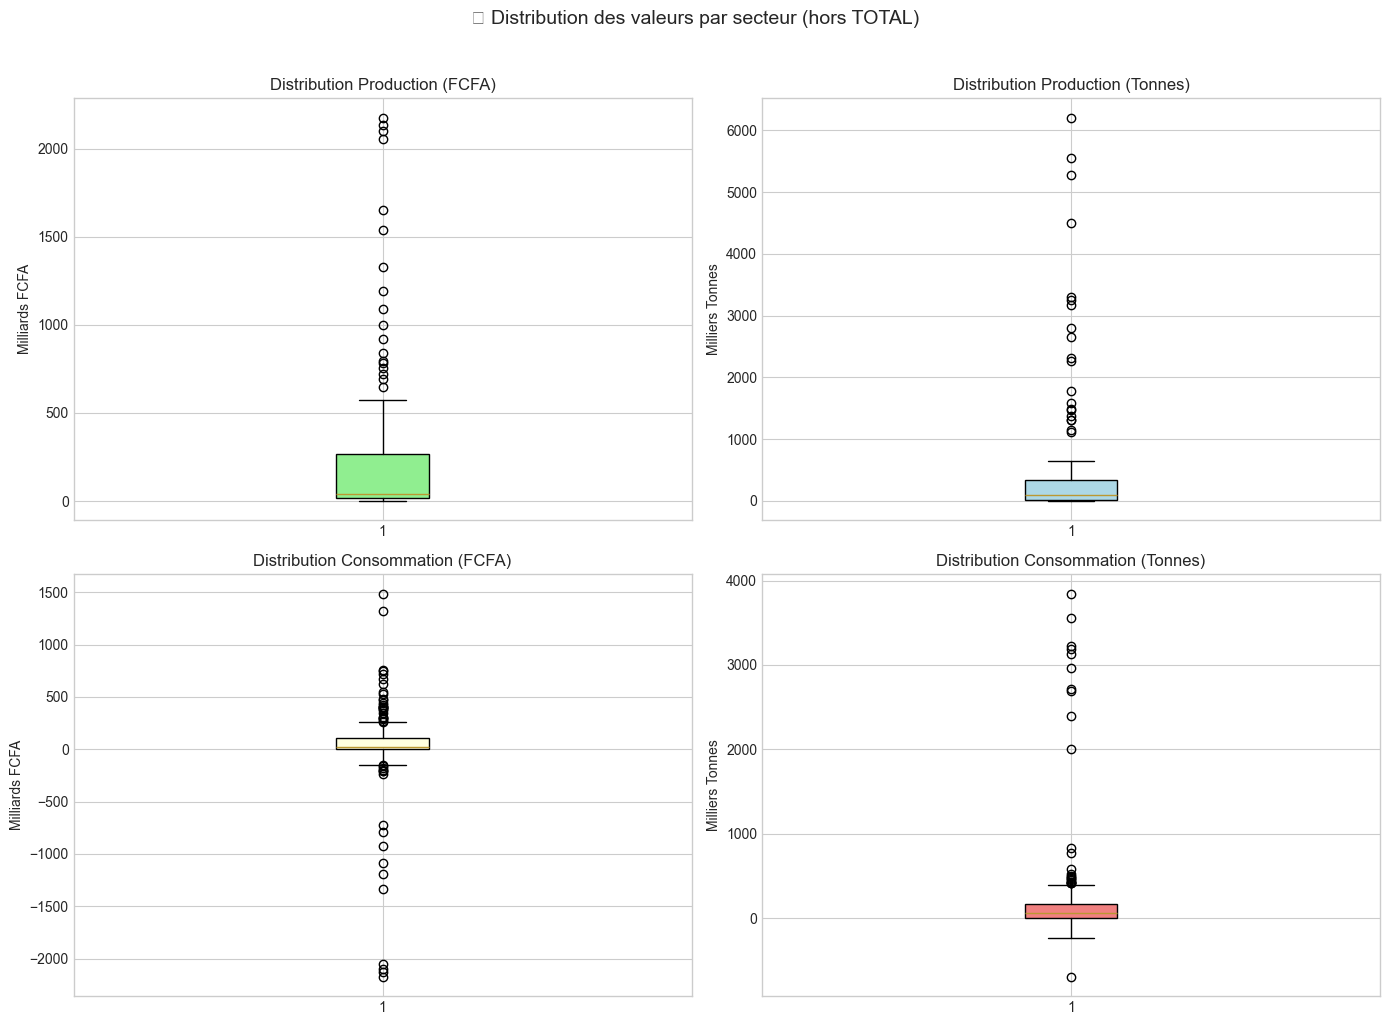


⚠️ Note: Les valeurs extrêmes (outliers) indiquent des secteurs dominants comme les produits minéraux et l'or.


In [17]:
# Distribution des valeurs avec boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Production FCFA
axes[0, 0].boxplot([df_sectors['production_fcfa']], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen'))
axes[0, 0].set_title('Distribution Production (FCFA)', fontsize=12)
axes[0, 0].set_ylabel('Milliards FCFA')

# Production Tonnes
axes[0, 1].boxplot([df_sectors['production_tonnes']], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue'))
axes[0, 1].set_title('Distribution Production (Tonnes)', fontsize=12)
axes[0, 1].set_ylabel('Milliers Tonnes')

# Consommation FCFA
axes[1, 0].boxplot([df_sectors['consommation_fcfa']], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightyellow'))
axes[1, 0].set_title('Distribution Consommation (FCFA)', fontsize=12)
axes[1, 0].set_ylabel('Milliards FCFA')

# Consommation Tonnes
axes[1, 1].boxplot([df_sectors['consommation_tonnes']], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral'))
axes[1, 1].set_title('Distribution Consommation (Tonnes)', fontsize=12)
axes[1, 1].set_ylabel('Milliers Tonnes')

plt.suptitle('📊 Distribution des valeurs par secteur (hors TOTAL)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\n⚠️ Note: Les valeurs extrêmes (outliers) indiquent des secteurs dominants comme les produits minéraux et l'or.")

### 6.4 Heatmap - Évolution par secteur et par année

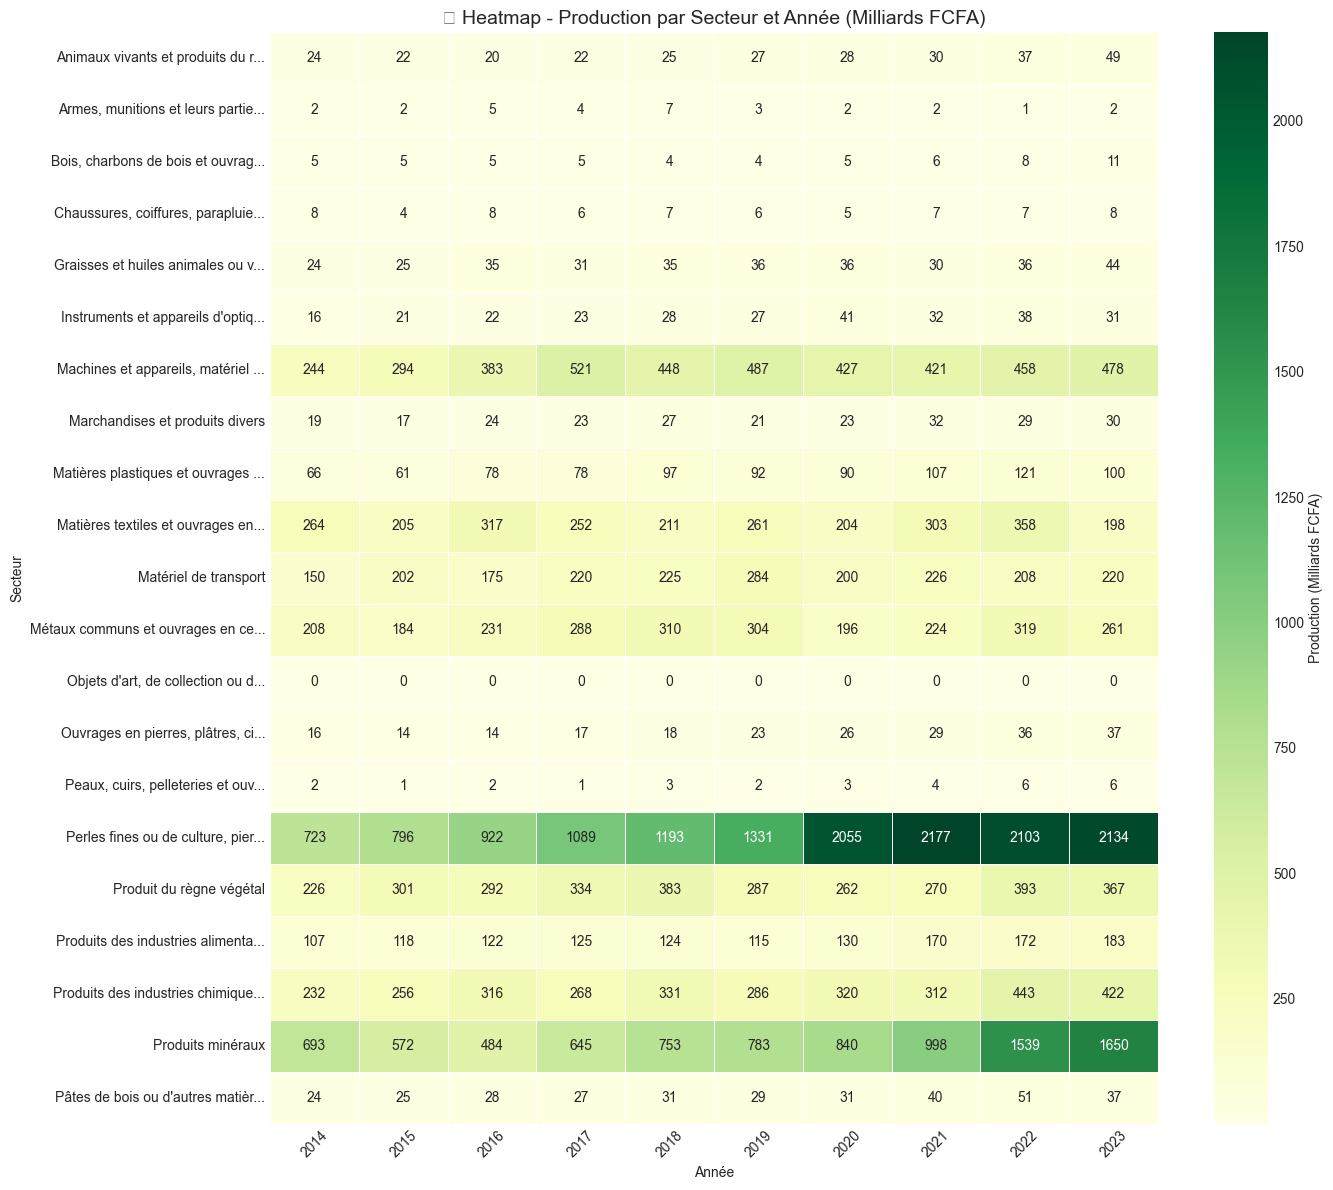

In [18]:
# Heatmap de la production par secteur et année
pivot_production = df_sectors.pivot(index='LIBELLES', columns='year', values='production_fcfa')

# Raccourcir les labels pour la lisibilité
pivot_production.index = [shorten_label(x, 35) for x in pivot_production.index]

plt.figure(figsize=(14, 12))
sns.heatmap(pivot_production, annot=True, fmt='.0f', cmap='YlGn', 
            linewidths=0.5, cbar_kws={'label': 'Production (Milliards FCFA)'})
plt.title('🏭 Heatmap - Production par Secteur et Année (Milliards FCFA)', fontsize=14)
plt.xlabel('Année')
plt.ylabel('Secteur')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.5 Balance commerciale (Exports - Imports)

In [19]:
# Calcul de la balance commerciale
df_commerce_total['balance_fcfa'] = df_commerce_total['exports_fcfa'] - df_commerce_total['imports_fcfa']
df_commerce_total['balance_tonnes'] = df_commerce_total['exports_tonnes'] - df_commerce_total['imports_tonnes']

# Graphique de la balance commerciale
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Balance Commerciale (Milliards FCFA)', 
                                   'Balance Commerciale (Milliers Tonnes)'))

# Balance FCFA
colors_fcfa = ['#27ae60' if x >= 0 else '#e74c3c' for x in df_commerce_total['balance_fcfa']]
fig.add_trace(
    go.Bar(x=df_commerce_total['year'], y=df_commerce_total['balance_fcfa'],
           marker_color=colors_fcfa, name='Balance FCFA'),
    row=1, col=1
)

# Balance Tonnes
colors_tonnes = ['#27ae60' if x >= 0 else '#e74c3c' for x in df_commerce_total['balance_tonnes']]
fig.add_trace(
    go.Bar(x=df_commerce_total['year'], y=df_commerce_total['balance_tonnes'],
           marker_color=colors_tonnes, name='Balance Tonnes'),
    row=1, col=2
)

fig.update_layout(
    height=400,
    title_text="⚖️ Balance Commerciale (Exports - Imports) 2014-2023",
    showlegend=False
)

# Ajouter une ligne à zéro
fig.add_hline(y=0, line_dash="dash", line_color="black", row=1, col=1)
fig.add_hline(y=0, line_dash="dash", line_color="black", row=1, col=2)

fig.show()

print("\n📊 Évolution de la balance commerciale:")
print(df_commerce_total[['year', 'balance_fcfa', 'balance_tonnes']].to_string(index=False))


📊 Évolution de la balance commerciale:
 year  balance_fcfa  balance_tonnes
 2014       -485.10        -3145.90
 2015       -504.00        -3722.60
 2016       -485.20        -3211.60
 2017       -600.30        -4907.70
 2018       -627.30        -5265.30
 2019       -584.90        -4650.60
 2020        112.40        -5553.50
 2021        193.60        -5835.10
 2022       -681.00        -5891.00
 2023       -866.70        -7218.10


## 7. 🔗 Analyse des corrélations

In [20]:
# Création d'un dataset unifié pour l'analyse des corrélations
# Fusion du commerce avec production/consommation

# Mapper les libellés commerce vers les libellés production/consommation
commerce_label_mapping = {
    'TOTAL': 'TOTAL',
    'Animaux vivants et produits du règne animal': 'Animaux vivants et produits du règne animal',
    'Produit du règne végétal': 'Produit du règne végétal',
    'Graisses et huiles animales ou végétales': 'Graisses et huiles animales ou végétales',
    "Produits des industries alimentaires : boissons, alcool, etc.": "Produits des industries alimentaires : boissons, alcool, etc.",
    "Bois, charbons de bois et ouvrages en bois": "Bois, charbons de bois et ouvrages en bois",
    'Produits minéraux': 'Produits minéraux',
    'Produits des industries chimiques et connexes': 'Produits des industries chimiques et connexes',
    'Matières plastiques et ouvrages en ces matières': 'Matières plastiques et ouvrages en ces matières',
}

# Fusionner les données
df_full = df_combined.merge(
    df_commerce_merged,
    on=['LIBELLES', 'year'],
    how='left'
)

print("✅ Dataset unifié créé!")
print(f"📊 Dimensions: {df_full.shape}")
print(f"\n📋 Colonnes disponibles:")
for col in df_full.columns:
    print(f"   - {col}")

# Aperçu
df_full.head()

✅ Dataset unifié créé!
📊 Dimensions: (220, 11)

📋 Colonnes disponibles:
   - SH
   - LIBELLES
   - year
   - production_fcfa
   - production_tonnes
   - consommation_fcfa
   - consommation_tonnes
   - imports_fcfa
   - exports_fcfa
   - imports_tonnes
   - exports_tonnes


,SH,LIBELLES,year,production_fcfa,production_tonnes,consommation_fcfa,consommation_tonnes,imports_fcfa,exports_fcfa,imports_tonnes,exports_tonnes
0,Ensemble,TOTAL,2014,3056.10,5761.50,485.10,3145.90,1770.60,1285.50,4453.70,1307.80
1,I,Animaux vivants et produits du règne animal,2014,24.50,100.60,14.90,79.00,19.70,4.80,89.80,10.80
2,II,Produit du règne végétal,2014,226.10,1149.30,-43.30,44.50,91.40,134.70,596.90,552.40
3,III,Graisses et huiles animales ou végétales,2014,23.90,95.60,8.70,63.20,16.30,7.60,79.40,16.20
4,IV,Produits des industries alimentaires : boisson...,2014,106.70,305.90,91.10,206.50,98.90,7.80,256.20,49.70


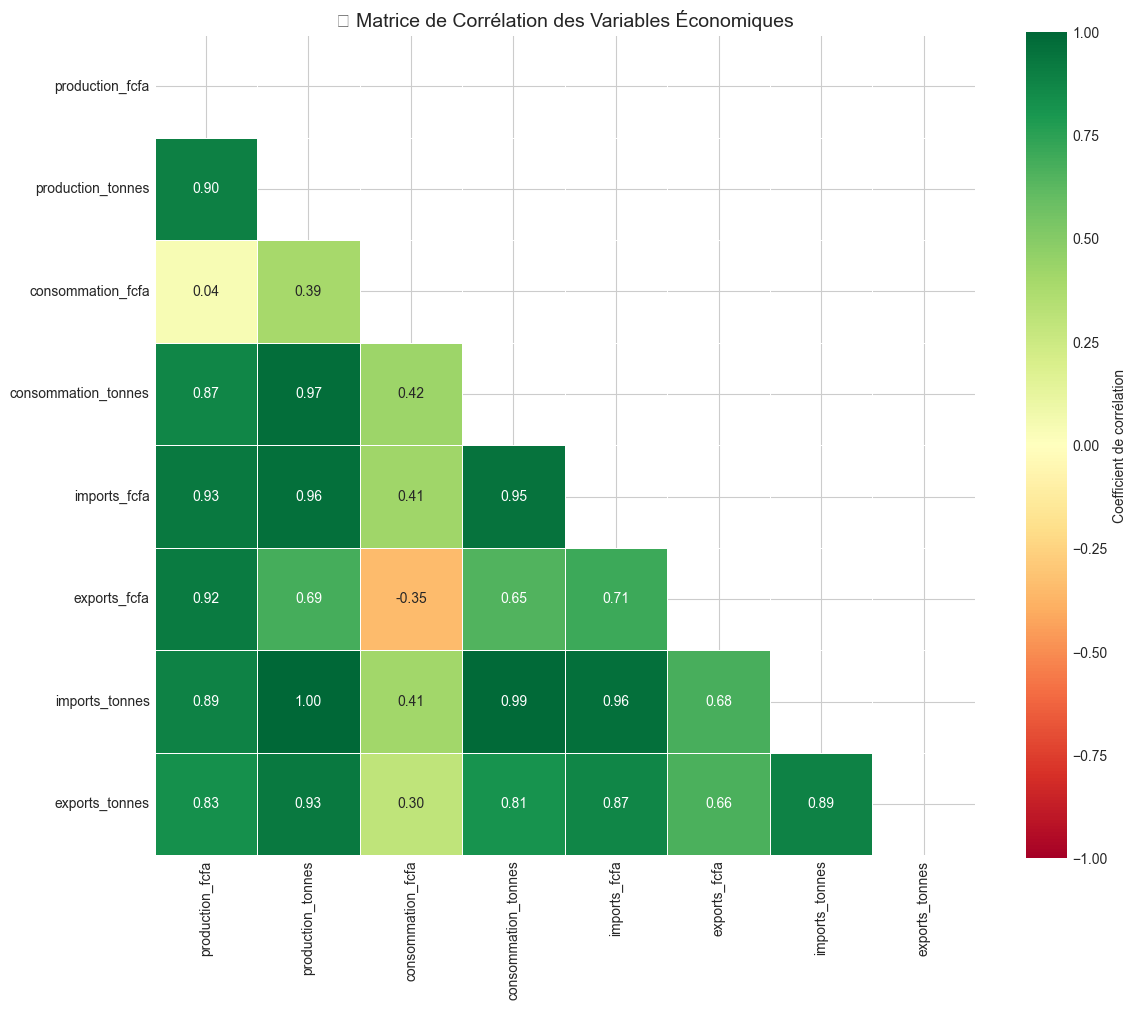


📊 Interprétation des corrélations fortes (|r| > 0.7):
   • production_fcfa ↔ production_tonnes: 0.90
   • production_fcfa ↔ consommation_tonnes: 0.87
   • production_fcfa ↔ imports_fcfa: 0.93
   • production_fcfa ↔ exports_fcfa: 0.92
   • production_fcfa ↔ imports_tonnes: 0.89
   • production_fcfa ↔ exports_tonnes: 0.83
   • production_tonnes ↔ consommation_tonnes: 0.97
   • production_tonnes ↔ imports_fcfa: 0.96
   • production_tonnes ↔ imports_tonnes: 1.00
   • production_tonnes ↔ exports_tonnes: 0.93
   • consommation_tonnes ↔ imports_fcfa: 0.95
   • consommation_tonnes ↔ imports_tonnes: 0.99
   • consommation_tonnes ↔ exports_tonnes: 0.81
   • imports_fcfa ↔ exports_fcfa: 0.71
   • imports_fcfa ↔ imports_tonnes: 0.96
   • imports_fcfa ↔ exports_tonnes: 0.87
   • imports_tonnes ↔ exports_tonnes: 0.89


In [21]:
# Matrice de corrélation
numeric_cols_full = ['production_fcfa', 'production_tonnes', 'consommation_fcfa', 
                     'consommation_tonnes', 'imports_fcfa', 'exports_fcfa',
                     'imports_tonnes', 'exports_tonnes']

# Calculer les corrélations (en excluant les NaN)
df_numeric = df_full[numeric_cols_full].dropna()
correlation_matrix = df_numeric.corr()

# Visualisation
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdYlGn',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Coefficient de corrélation'})

plt.title('🔗 Matrice de Corrélation des Variables Économiques', fontsize=14)
plt.tight_layout()
plt.show()

print("\n📊 Interprétation des corrélations fortes (|r| > 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"   • {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_val:.2f}")

## 8. 📋 Analyse des tendances temporelles

In [22]:
# Calcul des taux de croissance annuels
def calculate_growth_rates(df, value_col, year_col='year'):
    """Calcule les taux de croissance annuels"""
    df_sorted = df.sort_values(year_col)
    growth_rates = df_sorted[value_col].pct_change() * 100
    return growth_rates

# Taux de croissance pour les totaux
df_total_sorted = df_total.sort_values('year').copy()
df_total_sorted['growth_prod_fcfa'] = calculate_growth_rates(df_total_sorted, 'production_fcfa')
df_total_sorted['growth_prod_tonnes'] = calculate_growth_rates(df_total_sorted, 'production_tonnes')

df_commerce_sorted = df_commerce_total.sort_values('year').copy()
df_commerce_sorted['growth_imports'] = calculate_growth_rates(df_commerce_sorted, 'imports_fcfa')
df_commerce_sorted['growth_exports'] = calculate_growth_rates(df_commerce_sorted, 'exports_fcfa')

# Visualisation des taux de croissance
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Croissance Production (%)', 'Croissance Commerce (%)'))

# Production
fig.add_trace(
    go.Bar(x=df_total_sorted['year'], y=df_total_sorted['growth_prod_fcfa'],
           name='Production FCFA', marker_color='#2ecc71'),
    row=1, col=1
)

# Commerce
fig.add_trace(
    go.Bar(x=df_commerce_sorted['year'], y=df_commerce_sorted['growth_imports'],
           name='Imports', marker_color='#e74c3c'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=df_commerce_sorted['year'], y=df_commerce_sorted['growth_exports'],
           name='Exports', marker_color='#3498db'),
    row=1, col=2
)

fig.update_layout(height=400, title_text="📈 Taux de Croissance Annuels (%)", barmode='group')
fig.add_hline(y=0, line_dash="dash", line_color="black", row=1, col=1)
fig.add_hline(y=0, line_dash="dash", line_color="black", row=1, col=2)
fig.show()

# Statistiques de croissance
print("\n📊 Statistiques de croissance (Production FCFA):")
print(f"   Croissance moyenne annuelle: {df_total_sorted['growth_prod_fcfa'].mean():.2f}%")
print(f"   Croissance min: {df_total_sorted['growth_prod_fcfa'].min():.2f}%")
print(f"   Croissance max: {df_total_sorted['growth_prod_fcfa'].max():.2f}%")


📊 Statistiques de croissance (Production FCFA):
   Croissance moyenne annuelle: 8.50%
   Croissance min: -1.22%
   Croissance max: 17.46%


## 9. 💾 Sauvegarde des données préparées

In [23]:
# Création du répertoire processed s'il n'existe pas
processed_path = Path("../data/processed")
processed_path.mkdir(parents=True, exist_ok=True)

# Sauvegarde des datasets préparés pour les prochains notebooks
df_full.to_csv(processed_path / "data_unified.csv", index=False)
df_combined.to_csv(processed_path / "production_consommation.csv", index=False)
df_commerce_merged.to_csv(processed_path / "commerce.csv", index=False)

# Créer un fichier de métadonnées
metadata = {
    'date_creation': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'datasets': {
        'data_unified.csv': {
            'description': 'Dataset complet avec Production, Consommation et Commerce',
            'dimensions': df_full.shape,
            'colonnes': list(df_full.columns)
        },
        'production_consommation.csv': {
            'description': 'Production et Consommation par secteur et année',
            'dimensions': df_combined.shape,
            'colonnes': list(df_combined.columns)
        },
        'commerce.csv': {
            'description': 'Import/Export par secteur et année',
            'dimensions': df_commerce_merged.shape,
            'colonnes': list(df_commerce_merged.columns)
        }
    },
    'periode': '2014-2023',
    'nb_secteurs': len(df_production_fcfa['LIBELLES'].unique()),
    'secteurs': list(df_production_fcfa['LIBELLES'].unique())
}

import json
with open(processed_path / "metadata.json", 'w', encoding='utf-8') as f:
    json.dump(metadata, f, ensure_ascii=False, indent=2, default=str)

print("✅ Données sauvegardées dans le répertoire 'data/processed/':")
print(f"   📁 data_unified.csv ({df_full.shape[0]} lignes × {df_full.shape[1]} colonnes)")
print(f"   📁 production_consommation.csv ({df_combined.shape[0]} lignes × {df_combined.shape[1]} colonnes)")
print(f"   📁 commerce.csv ({df_commerce_merged.shape[0]} lignes × {df_commerce_merged.shape[1]} colonnes)")
print(f"   📁 metadata.json")

✅ Données sauvegardées dans le répertoire 'data/processed/':
   📁 data_unified.csv (220 lignes × 11 colonnes)
   📁 production_consommation.csv (220 lignes × 7 colonnes)
   📁 commerce.csv (220 lignes × 6 colonnes)
   📁 metadata.json


## 10. 📝 Conclusions et Insights

### 🔍 Résumé de l'exploration des données

#### 📊 Structure des données
- **6 fichiers CSV** couvrant la période **2014-2023** (10 années)
- **22 secteurs économiques** classifiés selon le Système Harmonisé (SH)
- **Données complètes** : Aucune valeur manquante ni doublon

#### 📈 Tendances principales observées

1. **Production en croissance constante**
   - Production totale : de 3 056 Mds FCFA (2014) à 6 287 Mds FCFA (2023)
   - Croissance moyenne annuelle : **~8.5%**
   - Secteurs dominants : Métaux précieux (or), Produits minéraux, Machines

2. **Balance commerciale déficitaire**
   - Déficit structurel en volume (tonnes)
   - Excédents ponctuels en valeur (2020-2021) grâce aux exportations d'or
   - Importations croissantes : +102% entre 2014 et 2023

3. **Secteurs clés identifiés**
   - **Perles/Pierres précieuses (Or)** : Principal moteur des exportations (~2000 Mds FCFA)
   - **Produits minéraux** : Forte croissance de la production
   - **Produit du règne végétal** : Important pour l'agriculture locale
   - **Produits des industries alimentaires** : Consommation locale significative

4. **Corrélations importantes**
   - Forte corrélation (>0.9) entre production et imports
   - Production en tonnes fortement liée aux importations en tonnes
   - La consommation en FCFA montre des variations atypiques (valeurs négatives = exports > imports+production?)

#### ⚠️ Points d'attention pour le ML
- **Valeurs négatives** dans consommation_fcfa : à investiguer (possiblement des corrections ou exports nets)
- **Outliers importants** : Secteur Or/Métaux précieux domine largement
- **Saisonnalité** : Non détectable sur données annuelles
- **Tendance temporelle forte** : À considérer pour les modèles de prédiction

#### 🎯 Prochaines étapes
1. **Notebook 2** : Feature Engineering - Création de variables dérivées
2. **Notebook 3** : Entraînement du modèle XGBoost
3. **Notebook 4** : Évaluation et interprétabilité avec SHAP

In [24]:
# Résumé final
print("="*70)
print("📊 RÉSUMÉ DE L'EXPLORATION DES DONNÉES")
print("="*70)
print(f"""
✅ DONNÉES CHARGÉES ET EXPLORÉES AVEC SUCCÈS

📁 Sources de données:
   • Production (FCFA & Tonnes) : 2014-2023
   • Consommation (FCFA & Tonnes) : 2014-2023  
   • Commerce Import/Export (FCFA & Tonnes) : 2014-2023

📊 Statistiques clés:
   • Nombre de secteurs: 22 (dont 1 TOTAL)
   • Période couverte: 10 années (2014-2023)
   • Production totale 2023: {df_total[df_total['year']==2023]['production_fcfa'].values[0]:.1f} Mds FCFA
   • Imports totaux 2023: {df_commerce_total[df_commerce_total['year']==2023]['imports_fcfa'].values[0]:.1f} Mds FCFA
   • Exports totaux 2023: {df_commerce_total[df_commerce_total['year']==2023]['exports_fcfa'].values[0]:.1f} Mds FCFA

💾 Fichiers générés dans data/processed/:
   • data_unified.csv - Dataset complet unifié
   • production_consommation.csv - Données sectorielles
   • commerce.csv - Données import/export
   • metadata.json - Métadonnées

🎯 Prêt pour le Notebook 2: Feature Engineering!
""")
print("="*70)

📊 RÉSUMÉ DE L'EXPLORATION DES DONNÉES

✅ DONNÉES CHARGÉES ET EXPLORÉES AVEC SUCCÈS

📁 Sources de données:
   • Production (FCFA & Tonnes) : 2014-2023
   • Consommation (FCFA & Tonnes) : 2014-2023  
   • Commerce Import/Export (FCFA & Tonnes) : 2014-2023

📊 Statistiques clés:
   • Nombre de secteurs: 22 (dont 1 TOTAL)
   • Période couverte: 10 années (2014-2023)
   • Production totale 2023: 6286.9 Mds FCFA
   • Imports totaux 2023: 3576.8 Mds FCFA
   • Exports totaux 2023: 2710.1 Mds FCFA

💾 Fichiers générés dans data/processed/:
   • data_unified.csv - Dataset complet unifié
   • production_consommation.csv - Données sectorielles
   • commerce.csv - Données import/export
   • metadata.json - Métadonnées

🎯 Prêt pour le Notebook 2: Feature Engineering!

